Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the course folder on Google drive. **(10 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

Provide python code and analysis results first. Use them to support your answers to the two questions above.

FYI the column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA810/Data/'

Mounted at /content/drive


In [3]:
auto = pd.read_csv(data_folder+'Auto.csv')
auto.info()
display(auto.head(3))
display(auto.describe())
auto.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

-----------------------------------------

- Droping NAs





In [4]:
auto.replace('?', pd.NA, inplace=True) #with the help of chatgpt
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
auto.dropna(inplace=True)

  ----------------------------------
  **1. Should you drop any variable from regression analysis and why? (5 points)**


In [6]:
auto['name'].value_counts().head(20)

amc matador                  5
ford pinto                   5
toyota corolla               5
toyota corona                4
amc hornet                   4
chevrolet chevette           4
chevrolet impala             4
amc gremlin                  4
peugeot 504                  4
ford maverick                4
ford gran torino             3
honda civic                  3
chevrolet caprice classic    3
dodge colt                   3
volkswagen dasher            3
plymouth duster              3
chevrolet citation           3
chevrolet nova               3
pontiac catalina             3
plymouth fury iii            3
Name: name, dtype: int64

   - The only column that I'd drop is 'name', as it's a categorical column with 304 unique values.
   - Shown above, due to the low frequency of each unique value, it prevents the categorization from having any meanings.  

In [7]:
auto.drop('name', axis= 1, inplace=True)

  ---------------------------------------------------------
  **2. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)**


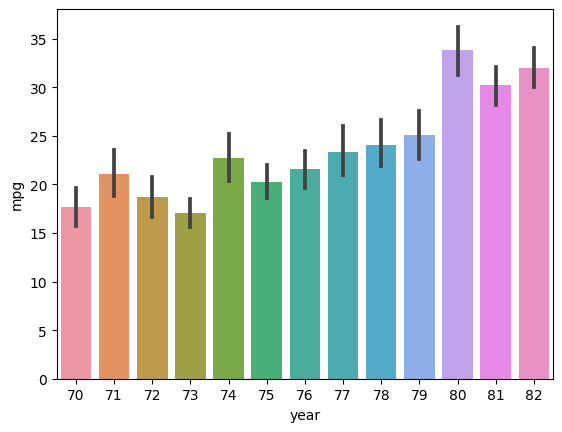

In [8]:
sns.barplot(y='mpg', x='year', data= auto);

 - Numeric: `mpg, cylinder, displacement, horsepower, weight, acceleration` should be treated as numeric values
   - *These values should be numeric because they're continuous*


   - Categorical:` year, origin `(mapping) should be treated as categorical values
    -  *These values should be categorical because they're either not continuous, or not having contineous relationship with the rest of the  variables*.
    - For example, the mappings of 'origin' does not have the numeric hierachy. And 'year' has certain observations such as '80' that see an unusual uptick. Hence, it might be better to not follow their numeric hierachy.

In [9]:
auto['horsepower'] = auto['horsepower'].astype(int)
auto['year'] = auto['year'].astype('category')
auto['origin'] = auto['origin'].astype('category')

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)

In [10]:
num_col= []
for i in auto.columns:
    if auto[i].dtype in ('int64', 'float64'):
        num_col.append(i)
num_col

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

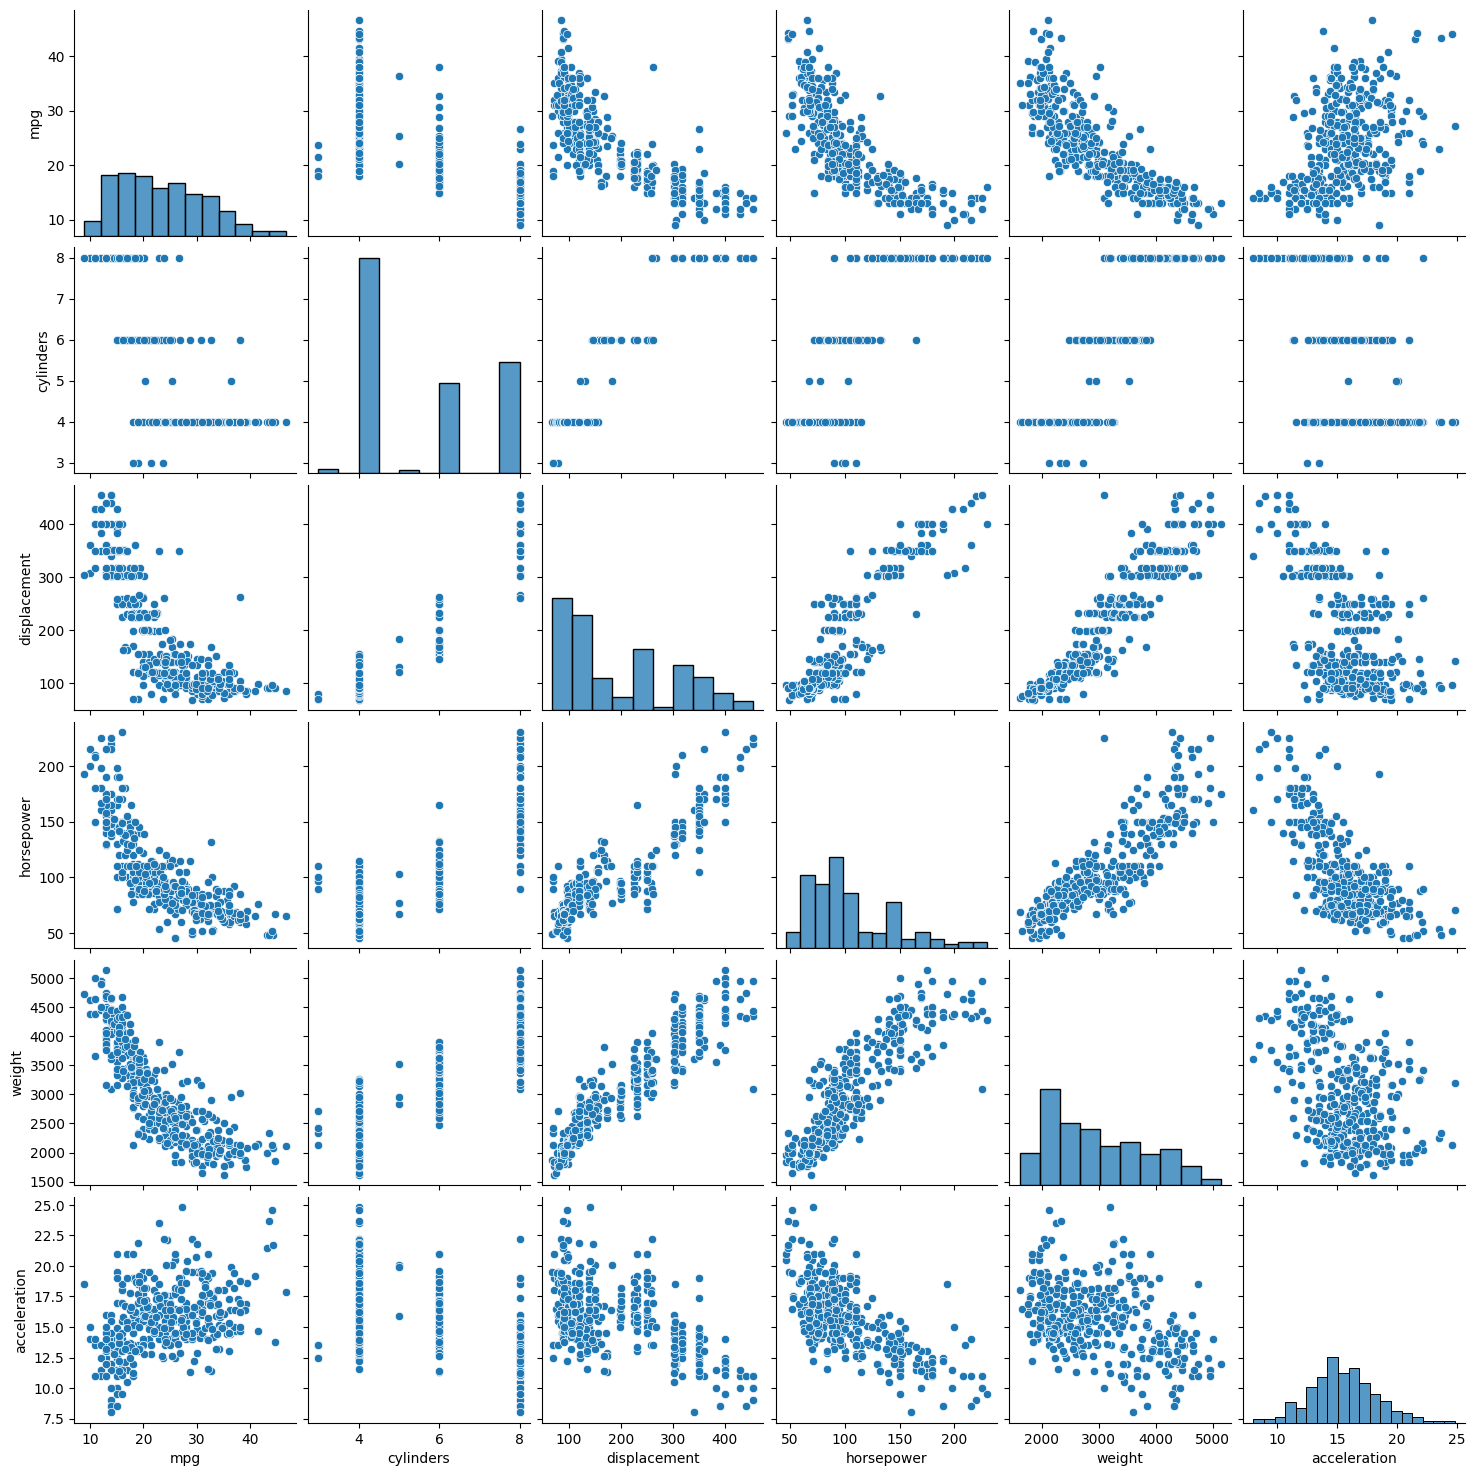

In [11]:
sns.pairplot(auto[num_col]);

-------------------------------------------------------
2. Discuss two interesting relationships that you notice. (10 points)

  1.   `mpg, weight, displacement, horsepower and cylinders` have close relationships.
    - Within this relationship, weight, displacement, horsepower and cylinders all have positive relationships, while mpg shows a negative relationship with the rest.
    - This means that when weight, displacement and horsepower increases, they tend to see the mpg decreases, most likely due to higher fuel usage.
  2. `accelerationa` shows a negative/reversed relationship with `horsepower`.
  3.  An additional interesting finding is that cars in this dataset rarely have odd numbers of cylinders.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (10+10=**20 points total**)

In [12]:
auto[ num_col].corr().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69
weight,-0.83,0.90,0.93,0.86,1.00,-0.42
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00


An interesting correlation is between `cylinders` and `displacement`,  at 0.95.

After research, this makes sense as cyclinders decide the volume of engine displacement. There is even a [formula](https://spicerparts.com/en-emea/calculators/engine-displacement-calculator#:~:text=The%20will%20result%20in%20the,x%208%20%3D%20353.86%20cubic%20inches.) for calculating displacement using cylinders.

Because of this, cylinders and displacement have similar correlations with the rest of variables. Although displacement has slight stronger correlations with the other variables.

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. **(15 points total)**


In [13]:
model1= ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin) ', auto).fit() # used help from ChatGPT
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     115.2
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          8.26e-143
Time:                        00:19:19   Log-Likelihood:                -983.13
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     372   BIC:                             2086.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.0199      2.142     17.

**1. Interpret the significant effects. (5 points)**

  By looking at P > |t|, we can tell if a variable is significant to the inference. The threshold is typically 0.05.  
  
  Several metrices that have the most significance are `weight, year` [76 : ], and `origin`. These metrics all have values smaller than **0.05**.



1.  `weight` : it has a very significant p-value, and a negative relationship with `mpg`. For every unit that weight increases, mpg would decrease by 0.0061.

--------------------------------------
**2. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)**

Compared to the thredshold 0.05, `cylinders` has a slightly higher P> |t| of 0.527. This means that `cylinders` is not statistical significant.


A surprising potential explanation could be that `cylinders` has an interaction with `displacement`. Its individual effect might not impact mpg as much. This was also supported through the lower correlations, when compared to `displacement`.

  ----------------------------------------
**3. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)**

I had `year` as a categorical variable, although its numeric form is significant, it does lower the R^2 from **0.855 to 0.824**.

This is likely due to the lack of linear relationship between `year` and `mpg`.

In [14]:
auto1= auto.copy()
auto1['year']= auto1['year'].astype(int)

model2= ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin) ', auto1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.79e-139
Time:                        00:19:19   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.

## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


**- Model # 1**

 Surprisingly,  the interation between `cylinders` and `displacement` has a positive coef at 0.012, and it is significant. This means one unit of increase of displacement mitigates `cylinders` by that much ( -2.418 + 0.012 = -2. 406). Vice versa.

In [15]:
interact_model1= ols('mpg ~ cylinders+ displacement + cylinders * displacement', auto).fit()
print(interact_model1.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 48.2204      2.347     20.545      0.000      43.606      52.835
cylinders                 -2.4184      0.535     -4.524      0.000      -3.469      -1.367
displacement              -0.1344      0.016     -8.321      0.000      -0.166      -0.103
cylinders:displacement     0.0118      0.002      5.711      0.000       0.008       0.016


**- Model # 2**

The interaction between `weight` and `origin` is significant, that is especially true for cars that have an origin of '3'/ 'Japanese'.

In [16]:
interact_model2= ols('mpg ~ weight+ C(origin) + weight * C(origin)', auto).fit()
print(interact_model2.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.1485      1.186     36.378      0.000      40.816      45.481
C(origin)[T.2]            1.1247      2.878      0.391      0.696      -4.534       6.783
C(origin)[T.3]           11.1117      3.574      3.109      0.002       4.084      18.139
weight                   -0.0069      0.000    -20.020      0.000      -0.008      -0.006
weight:C(origin)[T.2]  3.575e-06      0.001      0.003      0.997      -0.002       0.002
weight:C(origin)[T.3]    -0.0039      0.002     -2.508      0.013      -0.007      -0.001


**- Model # 3**

Following up on Q2.2, I wanted to see if the negative relationship between `acceleration` and `horsepower` has a significant impact on `mpg`.

It turns out the interaction is significant. '- 0.0157' change in the effect of'`acceleration` on the response variable causes a one-unit increase in `horsepower`. Vice versa.


In [17]:
interact_model3= ols('mpg ~ acceleration+ horsepower + acceleration* horsepower', auto).fit()
print(interact_model3.summary().tables[1])

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  33.5124      3.420      9.798      0.000      26.788      40.237
acceleration                0.8003      0.212      3.777      0.000       0.384       1.217
horsepower                  0.0176      0.027      0.641      0.522      -0.036       0.072
acceleration:horsepower    -0.0157      0.002     -7.838      0.000      -0.020      -0.012


## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#used chatgpt to learn in-sample/ out of sample R^2

X_train, X_test= train_test_split (auto, test_size= 0.2)

train_model= ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + C(year) + C(origin) ', X_train).fit()
print(train_model.rsquared.round(2))

test_model= train_model.predict(X_test)
print(r2_score(X_test.mpg, test_model).round(2))

0.86
0.83


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I discussed with Hazel for this homework. I needed her help with submission system and as a sounding board for the reasonableness of this homework.
2. I used ChatGPT with the following prompt to understand how to measure out of sample $R^2$:
> provide prompt here

Then I wrote the code that is submitted in the assignment.

3. I did not discuss with anyone or get any help from any generative AI tool.